# Lead Scoring Case Study



- In this assignment we have the dataset from the X Education who sells online courses to Industry Professional.

### The goal of the case study is :

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Import the required set of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 100)
# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split

## Reading the dataset

In [2]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

## Checking for Duplicate records

In [3]:
sum(lead_data.duplicated(subset='Prospect ID'))==0

True

- No duplicate record found

In [4]:
# checking the shape 

lead_data.shape

(9240, 37)

In [5]:
# checking the info

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# description of numerical columns

lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Data Cleaning / Pre-Processing

In [7]:
# Lets drop Prospect ID columns since these are not of use 

del_col = ['Prospect ID']
lead_data.drop(del_col,axis=1,inplace=True)

# again checking the shape after droppping
lead_data.shape

(9240, 36)

- As per the problem statement many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. This might be due to the reason that no value is selected by customer as they don't have the choice they want

In [8]:
# Converting 'Select' values to NaN.

lead_data = lead_data.replace('Select', np.nan)

In [9]:
# Checking null values 

null_prcnt_cols = 100*lead_data.isna().mean()
null_prcnt_cols

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [10]:
# List of columns that have more than 60% null 
list_of_del_columns = null_prcnt_cols[null_prcnt_cols>60.0].index.to_list()
list_of_del_columns

['How did you hear about X Education', 'Lead Profile']

In [11]:
# Deleting the columns and then checking the shape of the dataframe

lead_data.drop(list_of_del_columns,axis=1,inplace=True)
lead_data.shape

(9240, 34)

## Checking Lead Quality Column

In [12]:
# Number of Null values in columns

lead_data['Lead Quality'].isnull().sum()

4767

In [13]:
lead_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

- As per data dictionary Lead quality is based on the intution of employee, so we can impute 'Not Sure' in place of NaN 

In [14]:
lead_data['Lead Quality'] = lead_data['Lead Quality'].replace(np.nan, 'Not Sure')

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

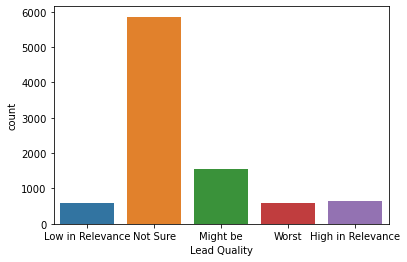

In [15]:
sns.countplot(lead_data['Lead Quality'])

In [16]:
# again checking null values in Lead Quality
lead_data['Lead Quality'].isnull().sum()

0

## Checking City column

In [17]:
# Number of null values in columns

lead_data['City'].isnull().sum()

3669

In [18]:
lead_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
# Imputing the null values in city column with Mumbai
lead_data['City'] = lead_data['City'].replace(np.nan, 'Mumbai')

In [20]:
# again checking number of null values in columns

lead_data['City'].isnull().sum()

0

## Checking Specialization Column

In [21]:
# Number of null values in columns

lead_data['Specialization'].isnull().sum()

3380

In [22]:
lead_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

- It is not wise to impute the null values in this column with any of these category as many categories have almost equal number of counts.

- We will replace the null values with 'Others' because it might be the case that the students couldn't find the specialisation so it remain null

In [23]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan , 'Others')

In [24]:
# again checking number of null values in columns

lead_data['Specialization'].isnull().sum()

0

## Checking Tags Column

In [25]:
# Number of null values in columns

lead_data['Tags'].isnull().sum()

3353

In [26]:
lead_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [27]:
# Imputing the null values in this column with 'Will revert after reading the email '

lead_data['Tags'] = lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

In [28]:
# again checking number of null values in columns

lead_data['Tags'].isnull().sum()

0

## Checking 'What matters most to you in choosing a course' column

In [29]:
# Number of null values in columns

lead_data['What matters most to you in choosing a course'].isnull().sum()

2709

In [30]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
# Imputing the null values in this column with 'Better Career Prospects'

lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [32]:
# again checking number of null values in columns

lead_data['What matters most to you in choosing a course'].isnull().sum()

0

## Checking 'What is your current Occupation' Column

In [33]:
# Number of null values in column

lead_data['What is your current occupation'].isnull().sum()

2690

In [34]:
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [35]:
# Imputing the null values in this column with 'Unemployed'

lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [36]:
# again checking number of null values in columns

lead_data['What is your current occupation'].isnull().sum()

0

## Checking Country Column

In [37]:
# Number of null values in column

lead_data['Country'].isnull().sum()

2461

In [38]:
lead_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [39]:
# Imputing the null values in this column with 'India'

lead_data['Country'] = lead_data['Country'].replace(np.nan,'India')

In [40]:
# again checking number of null values in columns

lead_data['Country'].isnull().sum()

0

## Checking Null Values left in the dataframe

In [41]:
100 * lead_data.isnull().mean()

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [42]:
lead_data.shape

(9240, 34)

## Checking Asymmetrique Activity Index and Score and Checking  Asymmetrique Profile Index and Score 

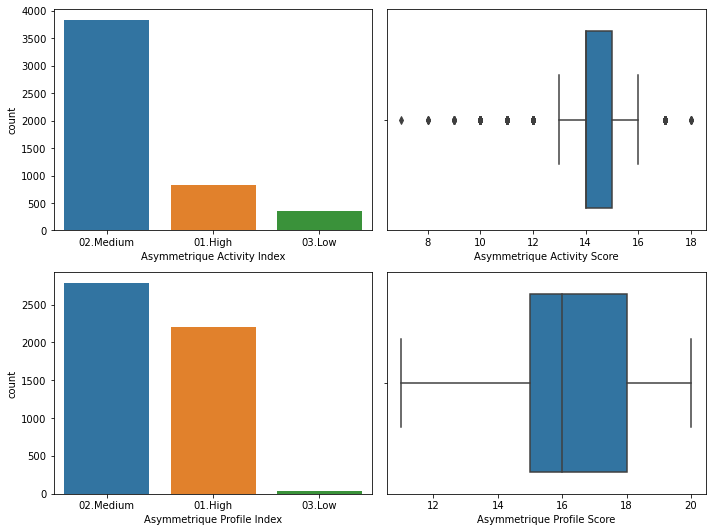

In [43]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(lead_data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(lead_data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead_data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(lead_data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

- As per data dictionary given Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score are defined as an index and score assigned to each customer based on their activity and their profile

- The above analysis is not giving much insights and also there is lot of variation so we will drop these four columns.

In [44]:
## making a list for the above four columns

del_cols = ['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']

In [45]:
## dropping these columns
lead_data = lead_data.drop(del_cols,axis=1)

## Again checking the null values

In [46]:
100 * lead_data.isna().mean()

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

- The four columns 'Lead Source','TotalVisits','Page Views Per Visit','Last Activity' has null value of less than 1.5% so we can simply drop these rows as it won't lead to much data source

In [47]:
# dropping rows where these columns has null values

lead_data.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'],inplace=True)

In [48]:
lead_data.shape

(9074, 30)

## Again checking the null values

In [49]:
100 * lead_data.isna().mean()

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

- We have removed all the null values from the dataset.

## Exploratory Data Analysis 

In [50]:
lead_data.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website   India   
1                   2.5             Email Opened   India   
2                   2.0             Email Opened   India   
3                   1.0              Unreachable   India   
4                   1.0        Converted to Lead   India   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0               

In [51]:
# checking info
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

## Bivariate Analysis

### Relationship between Lead Source and target column

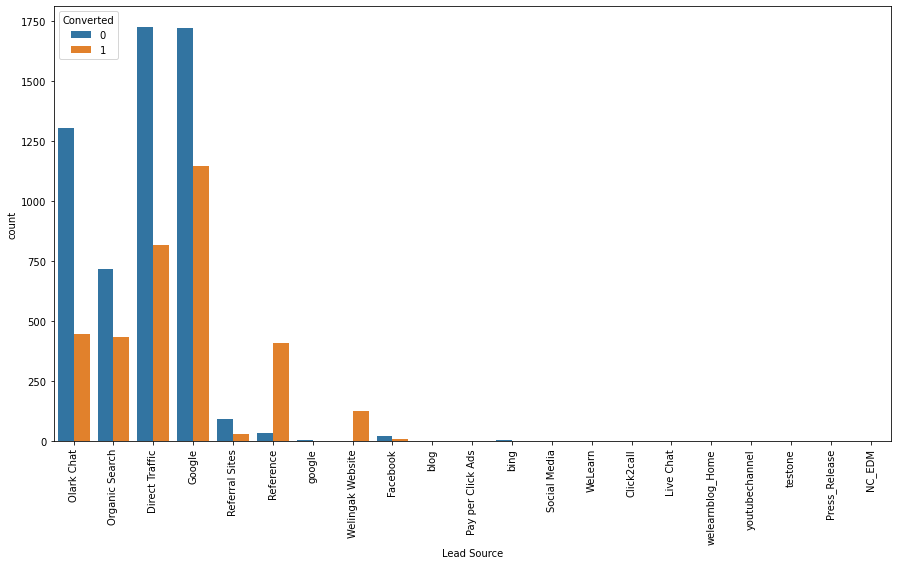

In [52]:
fig, axs = plt.subplots(figsize = (15,8))

sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

In [53]:
lead_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

- Since Google and google are same so we need to convert them. 
- Also we need to convert 'blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat',
  'welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM' into Other_platform

In [54]:
# Replacing 'google' to 'Google'
# Replacing the categories which are having low or no conversion into other platforms.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace([ 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 
                                                  'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 
                                                   'Press_Release', 'NC_EDM'], 'Other_Platforms')

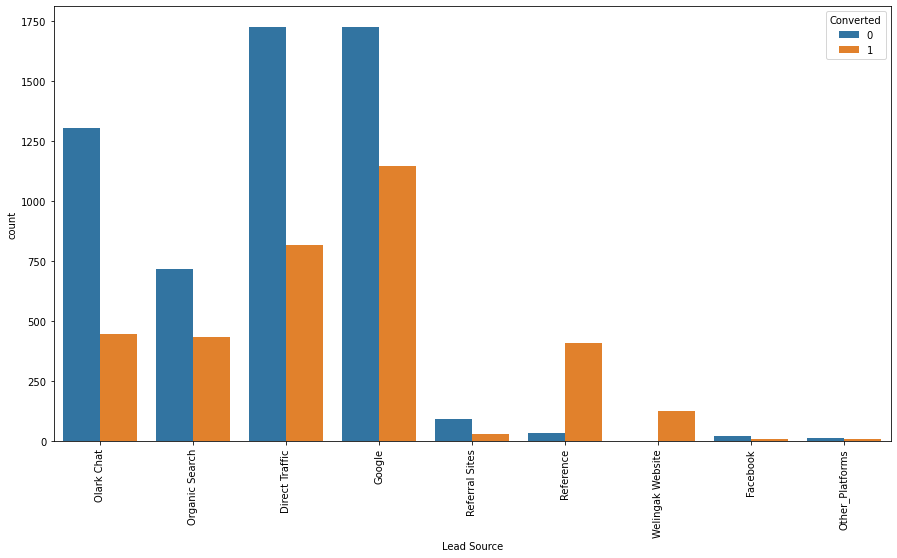

In [55]:
fig, axs = plt.subplots(figsize = (15,8))

sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

### So we can conclude from the above graph that :
- Google and Direct Traffic generate the maximum leads
- Reference and Welingak Website has a high conversion rate when compared to other

### Relationship between Do not Email and Do not call with respect to target

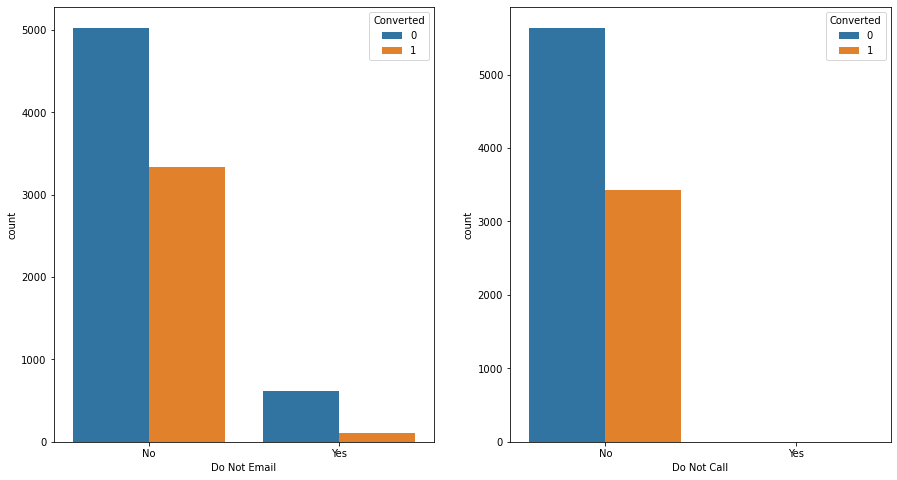

In [56]:
fig, axs = plt.subplots(1,2,figsize = (15,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data, ax = axs[1])
plt.show()

## Outlier Treatment 

In [57]:
cols = ['Total Time Spent on Website','Page Views Per Visit','TotalVisits']

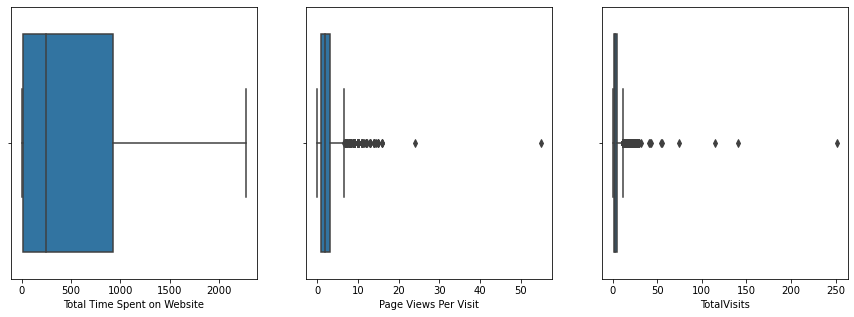

In [58]:
# Plotting the graph

plt.figure(figsize = (15, 5))
for i, col in enumerate(cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(lead_data[col])
plt.show()

In [59]:
# Removing outliers using 1.5 IQR method

for i in cols:
    q1 = lead_data[i].quantile(0.25)
    q3 = lead_data[i].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)

    lead_data = lead_data.loc[(lead_data[i] >= lower_bound) & (lead_data[i] <= upper_bound)]

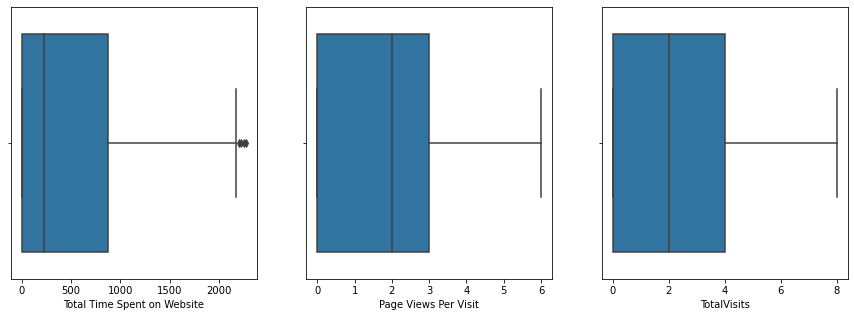

In [60]:
# again plotting the graph after outliers treatment

plt.figure(figsize = (15, 5))
for i, col in enumerate(cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(lead_data[col])
plt.show()

## Relationship between target and Last Activity Performed

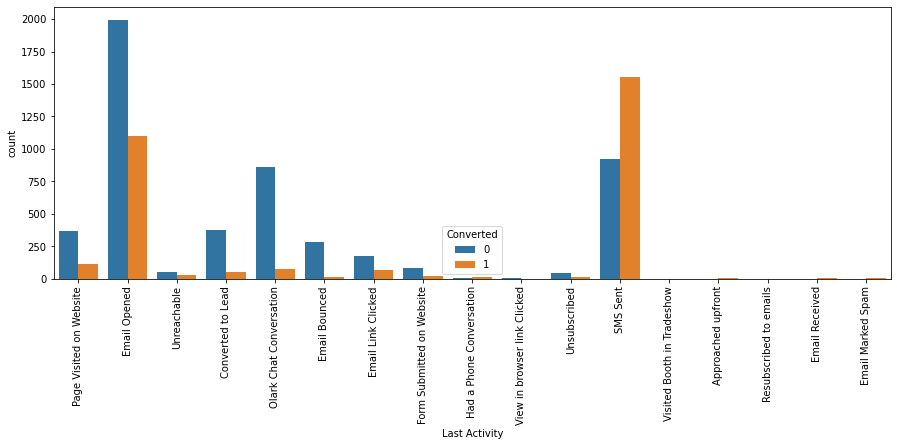

In [61]:
# plotting the graph

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

In [62]:
# checking all the unique categories

lead_data['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Unsubscribed', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Approached upfront', 'Resubscribed to emails', 'Email Received',
       'Email Marked Spam'], dtype=object)

In [63]:
# Replacing the categories which are having low or no conversion into other_Activity.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked', 
                                                    'Visited Booth in Tradeshow', 'Approached upfront',
                                                    'Resubscribed to emails','Email Received', 'Email Marked Spam'], 
                                                     'Other_Activity')


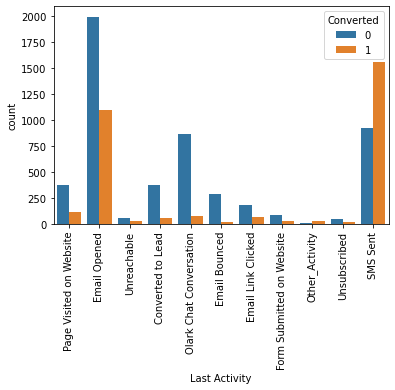

In [64]:
# again plotting the graph

sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

- From the above analysis we conclude that SMS Sent has higher conversion rate

## Relationship of Occupation with respect to Target

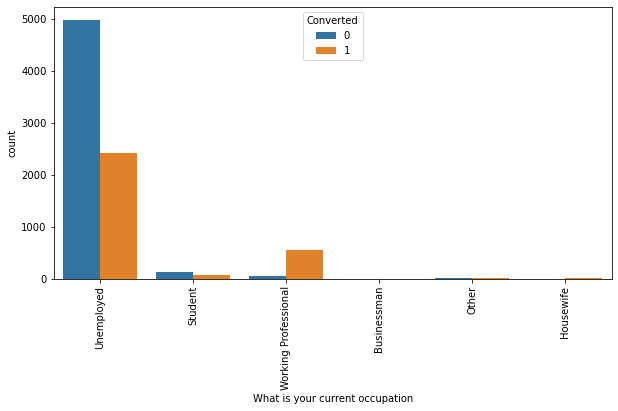

In [65]:
#Visualizing Occupation
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

- From the above analysis we conclude that Unemployed has higher conversion rate

## Relationship between Tags and Target column

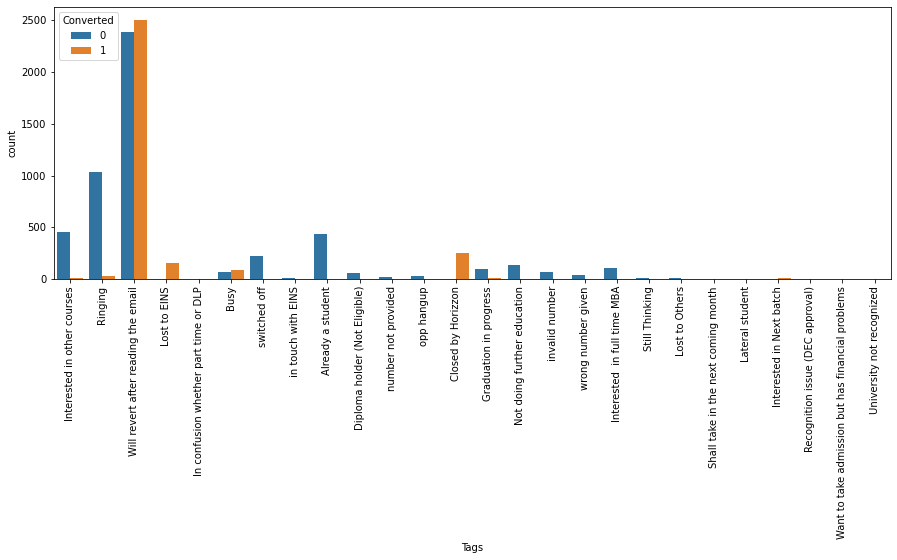

In [66]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

In [67]:
# Replacing the categories which are having low or no conversion into Other_Tags.
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

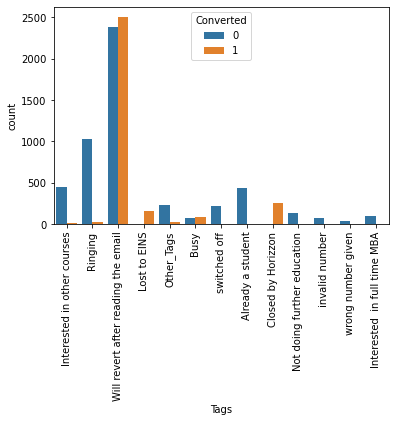

In [68]:
# again plotting the graph
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

- From the above analysis we conclude that 'Will revert after reading the email' has higher conversion rate

In [69]:
# Analysing the Country column

lead_data['Country'].describe()

count      8235
unique       38
top       India
freq       7976
Name: Country, dtype: object

- Since there is not much variance in this column and mostly the value is India so its of no use

In [70]:
# Analysing Search Column and checking whether the customer has seen the advertisement in any of the listed item
lead_data.Search.describe()

count     8235
unique       2
top         No
freq      8230
Name: Search, dtype: object

- Since there is not much variance in this column and more than 99% the value is No so its of no use

In [71]:
# analysing the Magazine column

lead_data.Magazine.describe()

count     8235
unique       1
top         No
freq      8235
Name: Magazine, dtype: object

- Since there is no variance in this column so this column is also of no use

In [72]:
# analysing the Newspaper Article column

lead_data['Newspaper Article'].describe()

count     8235
unique       1
top         No
freq      8235
Name: Newspaper Article, dtype: object

- Since there is no variance in this column so this column is also of no use

In [73]:
# analysing the Digital Advertisement column

lead_data['Digital Advertisement'].describe()

count     8235
unique       2
top         No
freq      8233
Name: Digital Advertisement, dtype: object

- Since there is no variance in this column so this column is also of no use

In [74]:
lead_data['X Education Forums'].describe()

count     8235
unique       1
top         No
freq      8235
Name: X Education Forums, dtype: object

- Since there is no variance in this column so this column is also of no use

In [75]:
lead_data['Newspaper'].describe()

count     8235
unique       1
top         No
freq      8235
Name: Newspaper, dtype: object

- Since there is no variance in this column so this column is also of no use

In [76]:
lead_data['Update me on Supply Chain Content'].describe()

count     8235
unique       1
top         No
freq      8235
Name: Update me on Supply Chain Content, dtype: object

- Since there is no variance in this column so this column is also of no use

In [77]:
lead_data['Get updates on DM Content'].describe()

count     8235
unique       1
top         No
freq      8235
Name: Get updates on DM Content, dtype: object

- Since there is no variance in this column so this column is also of no use

In [78]:
lead_data['I agree to pay the amount through cheque'].describe()

count     8235
unique       1
top         No
freq      8235
Name: I agree to pay the amount through cheque, dtype: object

- Since there is no variance in this column so this column is also of no use

In [79]:
lead_data['Through Recommendations'].describe()

count     8235
unique       2
top         No
freq      8232
Name: Through Recommendations, dtype: object

- Since there is almost zero variance in this column so this column is also of no use

In [80]:
lead_data['Receive More Updates About Our Courses'].describe()

count     8235
unique       1
top         No
freq      8235
Name: Receive More Updates About Our Courses, dtype: object

- Since there is no variance in this column so this column is also of no use

In [81]:
lead_data['A free copy of Mastering The Interview'].describe()

count     8235
unique       2
top         No
freq      5803
Name: A free copy of Mastering The Interview, dtype: object

- Since there is almost zero variance in this column so this column is also of no use

## Relationship between Last Notable Activity and Target Column

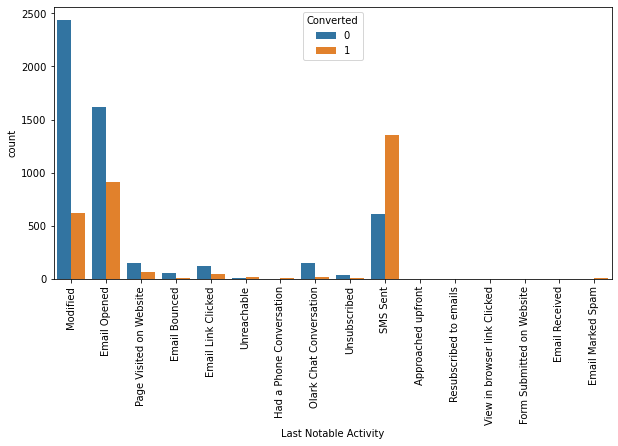

In [82]:
# Visualizing the column.
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

In [83]:
# Checking unique values

lead_data['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Had a Phone Conversation', 'Olark Chat Conversation',
       'Unsubscribed', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

- Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website', 'Email Received', 'Email Marked Spam' has no values at all.

In [84]:
# keeping considerable last activities as such and converting all others to "Other_Activity"
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Approached upfront',
                             'Resubscribed to emails', 'View in browser link Clicked',
                              'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 
                                                                  'Other_Last_Notable_Activity')

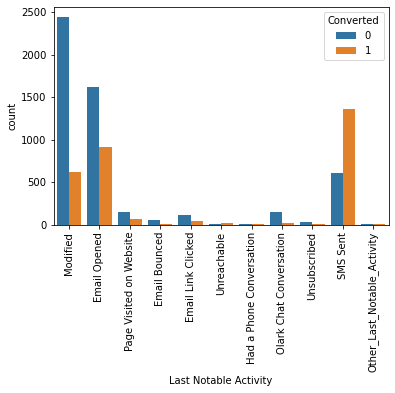

In [85]:
# again plotting the graph
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

- Here also we came to know that SMS Sent has a high conversion rayte when compared to other 

## Reason for Selecting the course and its relationship with Target

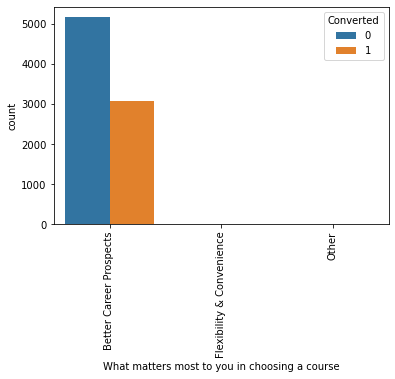

In [86]:
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead_data)
xticks(rotation = 90)
plt.show()

- Most of the leads are for Better Career Prospect but the conversion rate is not that goodm

##### From the above visualization and analysis we come to the conclusion that columns- 'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview' are not that relevant.

In [87]:
# We will drop all those columns that are not relevant from our business perspective.

new_lead_df= lead_data.copy()

In [88]:
new_lead_df.shape

(8235, 30)

In [89]:
new_lead_df= lead_data.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                     'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                     'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'Get updates on DM Content','I agree to pay the amount through cheque','Country',
                     'A free copy of Mastering The Interview'],axis=1)

In [90]:
new_lead_df.shape

(8235, 16)

In [91]:
new_lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      8235 non-null   int64  
 1   Lead Origin                      8235 non-null   object 
 2   Lead Source                      8235 non-null   object 
 3   Do Not Email                     8235 non-null   object 
 4   Do Not Call                      8235 non-null   object 
 5   Converted                        8235 non-null   int64  
 6   TotalVisits                      8235 non-null   float64
 7   Total Time Spent on Website      8235 non-null   int64  
 8   Page Views Per Visit             8235 non-null   float64
 9   Last Activity                    8235 non-null   object 
 10  Specialization                   8235 non-null   object 
 11  What is your current occupation  8235 non-null   object 
 12  Tags                

## Heatmap and correlation between Numerical Features (Total Visits ,Total Time Spent on Website ,Page Views Per Visit)

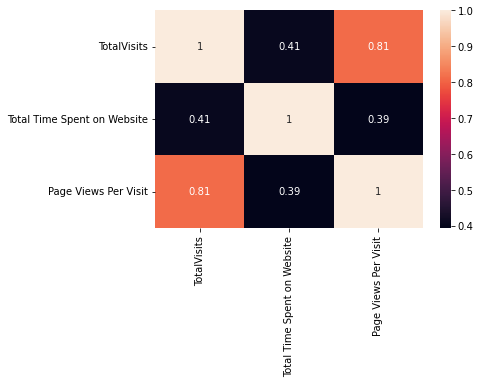

In [92]:
sns.heatmap(new_lead_df.drop(['Lead Number', 'Converted'], axis = 1).corr(),annot=True)
plt.show()

## Data Preparation for model building

In [93]:
# converting binary variables Yes/No to 1/0

yes_no_cols = ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

new_lead_df[yes_no_cols] = new_lead_df[yes_no_cols].apply(binary_map)

In [94]:
new_lead_df.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Others   
1                   2.5             Email Opened                   Others   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality    City Last Notable Activity  
0  Low in Relevance  Mumbai              Modified  
1          Not Sure  Mumbai          Email Opened  
2          Might be  Mumbai          Email Opened  
3          Not Sure  Mumbai              Modified  
4          Might be  Mumbai              Modified

## Creating Dummy Variable 

In [95]:
dummy_cols = ['Lead Origin', 'Lead Source', 'Last Activity','Specialization',
              'What is your current occupation','Lead Quality','Tags', 'City', 'Last Notable Activity']

In [96]:
# creating dummy columns
dummies = pd.get_dummies(new_lead_df[dummy_cols], drop_first=True)

# concat with original data set
new_lead_df = pd.concat([new_lead_df, dummies], axis = 1)

In [97]:
new_lead_df.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Others   
1                   2.5             Email Opened                   Others   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality    City Last Notable Activity  \
0  Low in Relevance  Mumbai              Modified   
1          Not Sure  Mumbai          Email Opened   
2          Might be  Mumbai          Email Opened   
3          Not Sure  Mumbai              Modified   
4          Might be  Mumbai              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Platforms  Lead Source_Reference  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0  

In [98]:
# dropping the original columns for which the dummies has been created

new_lead_df.drop(dummy_cols, axis = 1, inplace = True)
new_lead_df.shape

(8235, 82)

In [99]:
## Correaltion between all the feature after creating dummies
new_lead_df.corr()

Lead Number  Do Not Email  \
Lead Number                                            1.000000     -0.094119   
Do Not Email                                          -0.094119      1.000000   
Do Not Call                                            0.000604     -0.003191   
Converted                                              0.032045     -0.137307   
TotalVisits                                            0.064003     -0.014941   
Total Time Spent on Website                            0.026356     -0.039434   
Page Views Per Visit                                   0.069495      0.015367   
Lead Origin_Landing Page Submission                   -0.061325      0.102731   
Lead Origin_Lead Add Form                              0.025588     -0.031286   
Lead Origin_Lead Import                                0.078863     -0.017213   
Lead Source_Facebook                                   0.075827     -0.017508   
Lead Source_Google                                     0.140848     -0.066779   
Lead Source_Olark Chat                                -0.070481     -0.051580   
Lead Source_Organic Search                             0.000840      0.026562   
Lead Source_Other_Platforms                            0.017095      0.003385   
Lead Source_Reference                                  0.024179     -0.036453   
Lead Source_Referral Sites                             0.162073     -0.006038   
Lead Source_Welingak Website                           0.003419      0.004038   
Last Activity_Email Bounced                           -0.054154      0.643640   
Last Activity_Email Link Clicked                       0.028819     -0.042799   
Last Activity_Email Opened                             0.099625     -0.216118   
Last Activity_Form Submitted on Website                0.013531     -0.020966   
Last Activity_Olark Chat Conversation                  0.003660     -0.056174   
Last Activity_Other_Activity                           0.005348      0.002623   
Last Activity_Page Visited on Website                  0.012953      0.053668   
Last Activity_SMS Sent                                -0.130604     -0.020718   
Last Activity_Unreachable                              0.076987      0.012595   
Last Activity_Unsubscribed                            -0.001015      0.266452   
Specialization_Business Administration                -0.008187      0.006962   
Specialization_E-Business                              0.006212      0.007685   
Specialization_E-COMMERCE                             -0.002752      0.024057   
Specialization_Finance Management                     -0.014452     -0.009476   
Specialization_Healthcare Management                  -0.007598      0.011716   
Specialization_Hospitality Management                  0.007968      0.018945   
Specialization_Human Resource Management              -0.012694     -0.012406   
Specialization_IT Projects Management                 -0.027546      0.068867   
Specialization_International Business                  0.001847      0.010654   
Specialization_Marketing Management                   -0.001758     -0.023721   
Specialization_Media and Advertising                  -0.016390      0.001959   
Specialization_Operations Management                  -0.004803     -0.006210   
Specialization_Others                                  0.040049     -0.041980   
Specialization_Retail Management                      -0.011417      0.007189   
Specialization_Rural and Agribusiness                  0.027183      0.029298   
Specialization_Services Excellence                    -0.029510      0.059333   
Specialization_Supply Chain Management                -0.014296      0.003965   
Specialization_Travel and Tourism                      0.002305      0.060241   
What is your current occupation_Housewife             -0.014519     -0.009577   
What is your current occupation_Other                 -0.010684      0.001856   
What is your current occupation_Student               -0.035355      0.012495   
Wh

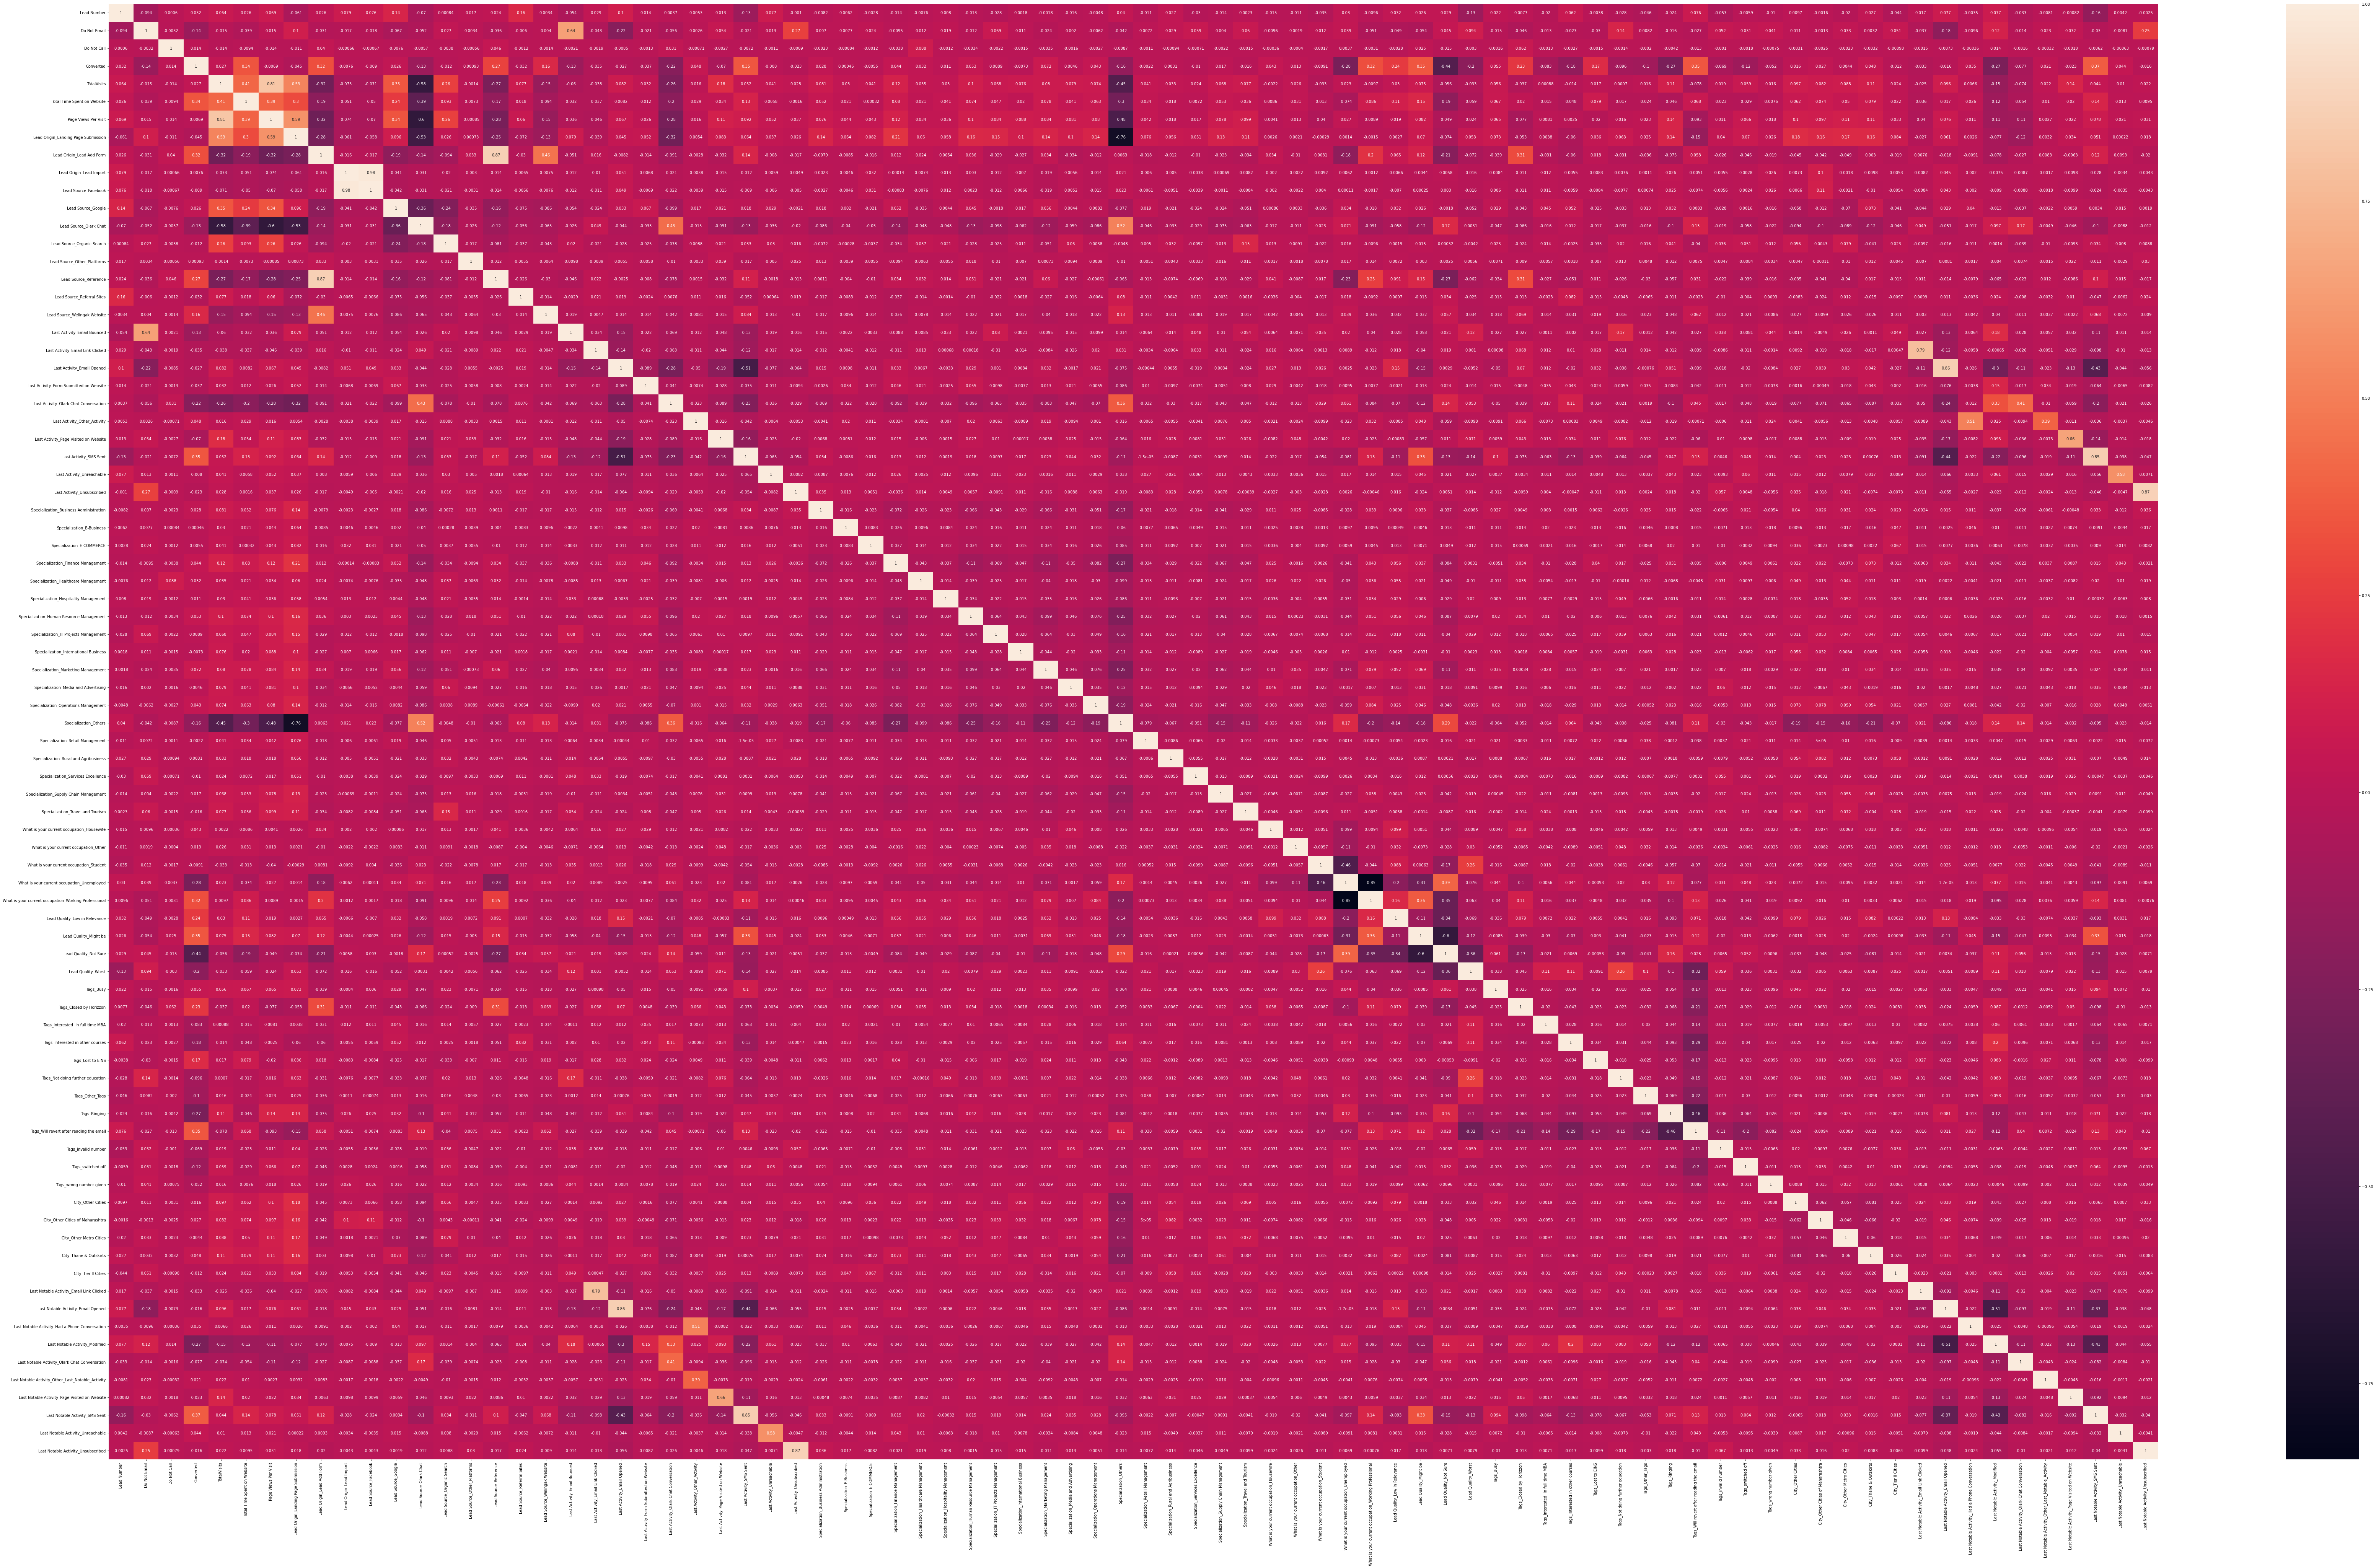

In [100]:
# heatmap of all the features after creating the dummy variables 
plt.figure(figsize = (120,70))
sns.heatmap(new_lead_df.corr(),annot=True)
plt.show()

In [101]:
# making the Lead number as index
new_lead_df.set_index('Lead Number', inplace = True)

In [102]:
new_lead_df.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
Lead Number                                                      
660737                  0            0          0          0.0   
660728                  0            0          0          5.0   
660727                  0            0          1          2.0   
660719                  0            0          0          1.0   
660681                  0            0          1          2.0   

             Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                      
660737                                 0                   0.0   
660728                               674                   2.5   
660727                              1532                   2.0   
660719                               305                   1.0   
660681                              1428                   1.0   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
660737                                         0                          0   
660728                                         0                          0   
660727                                         1                          0   
660719                                         1                          0   
660681                                         1                          0   

             Lead Origin_Lead Import  Lead Source_Facebook  \
Lead Number                                                  
660737                             0                     0   
660728                             0                     0   
660727                             0                     0   
660719                             0                     0   
660681                             0                     0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
660737                        0                       1   
660728                        0                       0   
660727                        0                       0   
660719                        0                       0   
660681                        1                       0   

             Lead Source_Organic Search  Lead Source_Other_Platforms  \
Lead Number                                                            
660737                                0                            0   
660728                                1                            0   
660727                                0                            0   
660719                                0                            0   
660681                                0                            0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
660737                           0                           0   
660728                           0                           0   
660727                           0                           0   
660719                           0                           0   
660681                           0                           0   

             Lead Source_Welingak Website  Last Activity_Email Bounced  \
Lead Number                                                              
660737                                  0                            0   
660728                                  0                            0   
660727                                  0                            0   
660719                                  0                            0   
660681                                  0                            0   

             Last Activity_Email Link Clicked  Last Activity_Email Opened  \
Lead Number                                                                 
660737                                     

### Splitting the Data into Training and Test Sets

The first basic step for regression is performing a train-test split.

In [103]:
# Putting feature variable to X
X = new_lead_df.drop(['Converted'], axis=1)

In [104]:
# storing response variable to y
y = new_lead_df['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [106]:
X_test.head()

Do Not Email  Do Not Call  TotalVisits  \
Lead Number                                           
591983                  0            0          0.0   
636002                  0            0          3.0   
639253                  0            0          0.0   
645291                  0            0          2.0   
652227                  0            0          3.0   

             Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                      
591983                                 0                   0.0   
636002                                62                   3.0   
639253                                 0                   0.0   
645291                                 2                   2.0   
652227                               717                   1.5   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
591983                                         0                          0   
636002                                         1                          0   
639253                                         0                          1   
645291                                         1                          0   
652227                                         0                          0   

             Lead Origin_Lead Import  Lead Source_Facebook  \
Lead Number                                                  
591983                             0                     0   
636002                             0                     0   
639253                             0                     0   
645291                             0                     0   
652227                             0                     0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
591983                        0                       1   
636002                        0                       0   
639253                        0                       0   
645291                        0                       0   
652227                        1                       0   

             Lead Source_Organic Search  Lead Source_Other_Platforms  \
Lead Number                                                            
591983                                0                            0   
636002                                1                            0   
639253                                0                            0   
645291                                0                            0   
652227                                0                            0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
591983                           0                           0   
636002                           0                           0   
639253                           1                           0   
645291                           0                           0   
652227                           0                           0   

             Lead Source_Welingak Website  Last Activity_Email Bounced  \
Lead Number                                                              
591983                                  0                            0   
636002                                  0                            0   
639253                                  0                            0   
645291                                  0                            0   
652227                                  0                            0   

             Last Activity_Email Link Clicked  Last Activity_Email Opened  \
Lead Number                                                                 
591983                                      0                           1   
636002                                     

## Rescaling the feature

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'dummy' variables and non-binary columns
num_vars = ['Total Time Spent on Website','Page Views Per Visit','TotalVisits']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  \
Lead Number                                           
605318                  0            0    -1.237208   
587329                  0            0    -0.277995   
632380                  0            0     2.599643   
581635                  0            0     0.681217   
585343                  0            0     0.201611   

             Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                      
605318                         -0.861871             -1.237696   
587329                          0.811804             -0.024037   
632380                         -0.416295             -0.266769   
581635                         -0.512038              1.189621   
585343                         -0.600417             -0.327452   

             Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
Lead Number                                                                   
605318                                         0                          1   
587329                                         1                          0   
632380                                         1                          0   
581635                                         0                          0   
585343                                         0                          0   

             Lead Origin_Lead Import  Lead Source_Facebook  \
Lead Number                                                  
605318                             0                     0   
587329                             0                     0   
632380                             0                     0   
581635                             0                     0   
585343                             0                     0   

             Lead Source_Google  Lead Source_Olark Chat  \
Lead Number                                               
605318                        0                       0   
587329                        0                       0   
632380                        1                       0   
581635                        0                       0   
585343                        1                       0   

             Lead Source_Organic Search  Lead Source_Other_Platforms  \
Lead Number                                                            
605318                                0                            0   
587329                                0                            0   
632380                                0                            0   
581635                                1                            0   
585343                                0                            0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
605318                           1                           0   
587329                           0                           0   
632380                           0                           0   
581635                           0                           0   
585343                           0                           0   

             Lead Source_Welingak Website  Last Activity_Email Bounced  \
Lead Number                                                              
605318                                  0                            0   
587329                                  0                            0   
632380                                  0                            0   
581635                                  0                            0   
585343                                  0                            0   

             Last Activity_Email Link Clicked  Last Activity_Email Opened  \
Lead Number                                                                 
605318                                      0                           0   
587329                                     

In [110]:
### Checking the conversion rate
conversion_rate = (sum(new_lead_df['Converted'])/len(new_lead_df['Converted'].index))*100
conversion_rate

37.207043108682456

- We have around 37% conversion rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

## Model Building

In [111]:
import statsmodels.api as sm

In [112]:
# Logistic regression model with StatsModels

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5683
Model Family:                Binomial   Df Model:                           80
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.9
Date:                Mon, 16 Oct 2023   Deviance:                       2309.8
Time:                        21:49:41   Pearson chi2:                 4.83e+04
No. Iterations:                    25   Pseudo R-squ. (CS):             0.6035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9635   2.27e+05  -8.65e-06      1.000   -4.45e+05    4.45e+05
Do Not Email                                            -0.8609      0.328     -2.624      0.009      -1.504      -0.218
Do Not Call                                             20.1986   3.56e+05   5.67e-05      1.000   -6.98e+05    6.98e+05
TotalVisits                                              0.1253      0.106      1.186      0.236      -0.082       0.332
Total Time Spent on Website                              1.0456      0.065     15.973      0.000       0.917       1.174
Page Views Per Visit                                    -0.3440      0.106     -3.248      0.001      -0.552      -0.136
Lead Origin_Landing Page Submission                     -0.8451      0.244     -3.457      0.001      -1.324      -0.366
Lead Origin_Lead Add Form                               24.3089   2.03e+05      0.000      1.000   -3.98e+05    3.98e+05
Lead Origin_Lead Import                                 30.2419   3.56e+05   8.49e-05      1.000   -6.98e+05    6.98e+05
Lead Source_Facebook                                   -30.3994   3.56e+05  -8.54e-05      1.000   -6.98e+05    6.98e+05
Lead Source_Google                                       0.2715      0.166      1.634      0.102      -0.054       0.597
Lead Source_Olark Chat                                   0.7830      0.251      3.116      0.002       0.290       1.276
Lead Source_Organic Search                               0.4542      0.233      1.946      0.052      -0.003       0.911
Lead Source_Other_Platforms                             -0.4354      1.251     -0.348      0.728      -2.887       2.016
Lead Source_Reference                                  -23.0585   2.03e+05     -0.000      1.000   -3.98e+05    3.98e+05
Lead Source_Referral Sites                               0.0512      0.509      0.101      0.920      -0.946       1.049
Lead Source_Welingak Website                             2.9631   2.06e+05   1.44e-05      1.000   -4.03e+05    4.03e+05
Last Activity_Email Bounced                             -0.6533      0.744     -0.878      0.380      -2.111       0.805
Last Activity_Email Link Clicked                         0.8959      0.584      1.533      0.125      -0.249       2.041
Last Activity_Email Opened                               0.2111      0.397      0.531      0.595      -0.568       0.990
Last Activity_Form Submitted on Website                  0.5007      0.596      0.840      0.401      -0.668       1.670
Last Activity_Olark Chat Conversation                   -0.4603      0.405     -1.136      0.256      -1.254       0.334
Last Activity_Other_Activity                             1

## Feature Selectin using RFE

In [113]:
# importing the library

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [114]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [115]:
# For each of the columns whether or not it is on top 15. 'True' means it got selected.
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True])

In [116]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [117]:
col = X_train.columns[rfe.support_]

## Assessing the model with statsmodel

In [118]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5748
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1400.1
Date:                Mon, 16 Oct 2023   Deviance:                       2800.1
Time:                        21:49:45   Pearson chi2:                 3.44e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5683
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9303      0.238     -8.103      0.000      -2.397      -1.463
Do Not Email                                -1.3451      0.238     -5.662      0.000      -1.811      -0.880
Lead Origin_Lead Add Form                    1.1614      0.401      2.897      0.004       0.376       1.947
Lead Source_Welingak Website                23.4804   1.13e+04      0.002      0.998   -2.22e+04    2.23e+04
Last Activity_Olark Chat Conversation       -1.4203      0.198     -7.182      0.000      -1.808      -1.033
Lead Quality_Not Sure                       -3.4670      0.136    -25.555      0.000      -3.733      -3.201
Lead Quality_Worst                          -3.0862      0.709     -4.351      0.000      -4.476      -1.696
Tags_Busy                                    4.2817      0.358     11.970      0.000       3.581       4.983
Tags_Closed by Horizzon                      8.4996      1.059      8.026      0.000       6.424      10.575
Tags_Lost to EINS                            9.2780      0.764     12.141      0.000       7.780      10.776
Tags_Ringing                                -1.4161      0.348     -4.067      0.000      -2.099      -0.734
Tags_Will revert after reading the email     4.0742      0.257     15.827      0.000       3.570       4.579
Tags_invalid number                         -1.7229      1.145     -1.505      0.132      -3.967       0.521
Tags_switched off                           -2.9230      0.780     -3.746      0.000      -4.452      -1.394
Last Notable Activity_SMS Sent               2.5907      0.126     20.603      0.000       2.344       2.837
Last Notable Activity_Unsubscribed           1.8887      0.590      3.199      0.001       0.731       3.046
============================================================================================================
"""

# Checking VIF

In [119]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                      Lead Quality_Not Sure  2.96
10  Tags_Will revert after reading the email  2.77
1                  Lead Origin_Lead Add Form  1.63
9                               Tags_Ringing  1.56
13            Last Notable Activity_SMS Sent  1.55
2               Lead Source_Welingak Website  1.35
3      Last Activity_Olark Chat Conversation  1.22
0                               Do Not Email  1.19
7                    Tags_Closed by Horizzon  1.16
12                         Tags_switched off  1.12
6                                  Tags_Busy  1.11
14        Last Notable Activity_Unsubscribed  1.09
5                         Lead Quality_Worst  1.06
8                          Tags_Lost to EINS  1.04
11                       Tags_invalid number  1.03

In [121]:
# Dropping 'Lead Source_Welingak Website' as p-value is 0.998
col1 = col.drop('Lead Source_Welingak Website',1)

## Model 2

In [122]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5749
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1414.5
Date:                Mon, 16 Oct 2023   Deviance:                       2829.0
Time:                        21:49:45   Pearson chi2:                 4.18e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5661
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0481      0.245     -8.360      0.000      -2.528      -1.568
Do Not Email                                -1.3172      0.232     -5.673      0.000      -1.772      -0.862
Lead Origin_Lead Add Form                    2.6859      0.329      8.160      0.000       2.041       3.331
Last Activity_Olark Chat Conversation       -1.4270      0.197     -7.252      0.000      -1.813      -1.041
Lead Quality_Not Sure                       -3.4171      0.135    -25.354      0.000      -3.681      -3.153
Lead Quality_Worst                          -2.9812      0.713     -4.183      0.000      -4.378      -1.584
Tags_Busy                                    4.3563      0.363     12.005      0.000       3.645       5.068
Tags_Closed by Horizzon                      8.5120      1.063      8.009      0.000       6.429      10.595
Tags_Lost to EINS                            9.3442      0.767     12.186      0.000       7.841      10.847
Tags_Ringing                                -1.3618      0.353     -3.862      0.000      -2.053      -0.671
Tags_Will revert after reading the email     4.1603      0.265     15.700      0.000       3.641       4.680
Tags_invalid number                         -1.6103      1.143     -1.409      0.159      -3.850       0.629
Tags_switched off                           -2.7983      0.782     -3.580      0.000      -4.331      -1.266
Last Notable Activity_SMS Sent               2.5777      0.125     20.555      0.000       2.332       2.823
Last Notable Activity_Unsubscribed           1.8558      0.588      3.158      0.002       0.704       3.008
============================================================================================================
"""

In [123]:
# again checking the VIF now:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                      Lead Quality_Not Sure  2.87
9   Tags_Will revert after reading the email  2.74
12            Last Notable Activity_SMS Sent  1.55
8                               Tags_Ringing  1.54
1                  Lead Origin_Lead Add Form  1.26
2      Last Activity_Olark Chat Conversation  1.22
0                               Do Not Email  1.19
6                    Tags_Closed by Horizzon  1.15
11                         Tags_switched off  1.12
5                                  Tags_Busy  1.10
13        Last Notable Activity_Unsubscribed  1.09
4                         Lead Quality_Worst  1.06
7                          Tags_Lost to EINS  1.04
10                       Tags_invalid number  1.03

### All the P-value and VIF are in acceptance range so we will keep this as our final model

### Getting the predicted values on the train set

In [124]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
605318    0.999374
587329    0.001015
632380    0.031985
581635    0.014072
585343    0.061109
596564    0.003382
619884    0.303162
623297    0.979745
588886    0.213327
591823    0.213327
dtype: float64

### Creating a dataframe with the actual converted and the predicted probabilities 

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number
Lead Number                                        
605318               1        0.999374       605318
587329               0        0.001015       587329
632380               0        0.031985       632380
581635               0        0.014072       581635
585343               0        0.061109       585343

- Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0. Since the logistic curve gives us just the probabilities and not the actual classification of 'Converted' and 'Not Converted', we need to  a threshold probability to classify customers as 'Converted' and 'Not Converted'. 

- So we will choose initially 0.5 as an arbitrary cutoff and the choice of 0.5 is completely arbitrary

### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [126]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted
Lead Number                                                   
605318               1        0.999374       605318          1
587329               0        0.001015       587329          0
632380               0        0.031985       632380          0
581635               0        0.014072       581635          0
585343               0        0.061109       585343          0

## Let's take a look at the confusion matrix again 

In [127]:
# importing the library

from sklearn import metrics

In [128]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3448  139]
 [ 323 1854]]


In [129]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9198473282442748


## Metrics Beyond accuracy

In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Checking sensitivity of our logistic regression model
# Of all the conversions how well we have identified correctly.
# Around 88% has been identified correctly.

TP / float(TP+FN)

0.8516306844281121

In [132]:
# Let us calculate specificity
# It tells of all how we correctly detect.
TN / float(TN+FP)

0.9612489545581265

In [133]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.03875104544187343


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.9302558956347216


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9143463272341554


- Sensitivity of the model is around 88%

## Plotting the ROC curve

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

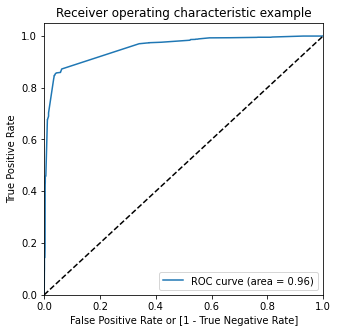

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding the optimal cut off point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [138]:

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  \
Lead Number                                                                     
605318               1        0.999374       605318          1    1    1    1   
587329               0        0.001015       587329          0    1    0    0   
632380               0        0.031985       632380          0    1    0    0   
581635               0        0.014072       581635          0    1    0    0   
585343               0        0.061109       585343          0    1    0    0   

             0.3  0.4  0.5  0.6  0.7  0.8  0.9  
Lead Number                                     
605318         1    1    1    1    1    1    1  
587329         0    0    0    0    0    0    0  
632380         0    0    0    0    0    0    0  
581635         0    0    0    0    0    0    0  
585343         0    0    0    0    0    0    0

In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377689  1.000000  0.000000
0.1   0.1  0.759542  0.972898  0.630053
0.2   0.2  0.776544  0.970142  0.659047
0.3   0.3  0.910999  0.858980  0.942570
0.4   0.4  0.919847  0.854846  0.959297
0.5   0.5  0.919847  0.851631  0.961249
0.6   0.6  0.919153  0.849334  0.961528
0.7   0.7  0.916898  0.836472  0.965710
0.8   0.8  0.873178  0.689940  0.984388
0.9   0.9  0.791811  0.458429  0.994146


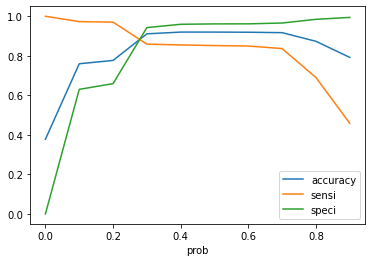

In [140]:
#  Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [141]:
# From the above plot we came to know that 0.3 is the optimum point to take it as a cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  \
Lead Number                                                                     
605318               1        0.999374       605318          1    1    1    1   
587329               0        0.001015       587329          0    1    0    0   
632380               0        0.031985       632380          0    1    0    0   
581635               0        0.014072       581635          0    1    0    0   
585343               0        0.061109       585343          0    1    0    0   

             0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
Lead Number                                                      
605318         1    1    1    1    1    1    1                1  
587329         0    0    0    0    0    0    0                0  
632380         0    0    0    0    0    0    0                0  
581635         0    0    0    0    0    0    0                0  
585343         0    0    0    0    0    0    0                0

In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9109993060374739

In [143]:
# checking confusion metrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3381,  206],
       [ 307, 1870]])

In [144]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8589802480477722

In [146]:

# Let us calculate specificity
TN / float(TN+FP)

0.9425703930861444

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.9425703930861444

In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9007707129094412


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9167570498915402


## Precision and Recall

In [150]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3448,  139],
       [ 323, 1854]])

##### Precision
TP / TP + FP

In [151]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9302558956347216

### Recall
TP / TP + FN

In [152]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8516306844281121

### Using sklearn utilities for the same

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9302558956347216

In [155]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8516306844281121

### Precision and Recall Trade-off

In [156]:
from sklearn.metrics import precision_recall_curve

In [157]:
y_train_pred_final.Converted, y_train_pred_final.predicted


(Lead Number
 605318    1
 587329    0
 632380    0
 581635    0
 585343    0
          ..
 655949    0
 659614    0
 581167    0
 590061    0
 601193    1
 Name: Converted, Length: 5764, dtype: int64,
 Lead Number
 605318    1
 587329    0
 632380    0
 581635    0
 585343    0
          ..
 655949    0
 659614    0
 581167    0
 590061    0
 601193    1
 Name: predicted, Length: 5764, dtype: int64)

In [158]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

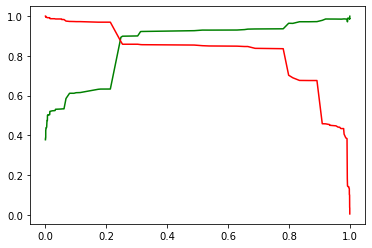

In [159]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on the test set:

In [160]:
# Scaling of test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits'
                                                            ,'Total Time Spent on Website','Page Views Per Visit']])

In [161]:
X_test = X_test[col1]
X_test.head()

Do Not Email  Lead Origin_Lead Add Form  \
Lead Number                                            
591983                  0                          0   
636002                  0                          0   
639253                  0                          1   
645291                  0                          0   
652227                  0                          0   

             Last Activity_Olark Chat Conversation  Lead Quality_Not Sure  \
Lead Number                                                                 
591983                                           0                      1   
636002                                           0                      1   
639253                                           0                      0   
645291                                           0                      0   
652227                                           0                      0   

             Lead Quality_Worst  Tags_Busy  Tags_Closed by Horizzon  \
Lead Number                                                           
591983                        0          0                        0   
636002                        0          0                        0   
639253                        0          0                        1   
645291                        0          0                        0   
652227                        0          0                        0   

             Tags_Lost to EINS  Tags_Ringing  \
Lead Number                                    
591983                       0             0   
636002                       0             0   
639253                       0             0   
645291                       0             0   
652227                       0             0   

             Tags_Will revert after reading the email  Tags_invalid number  \
Lead Number                                                                  
591983                                              1                    0   
636002                                              1                    0   
639253                                              0                    0   
645291                                              0                    0   
652227                                              1                    0   

             Tags_switched off  Last Notable Activity_SMS Sent  \
Lead Number                                                      
591983                       0                               0   
636002                       0                               0   
639253                       0                               0   
645291                       0                               0   
652227                       0                               0   

             Last Notable Activity_Unsubscribed  
Lead Number                                      
591983                                        0  
636002                                        0  
639253                                        0  
645291                                        0  
652227                                        0

In [162]:
X_test_sm = sm.add_constant(X_test)

In [163]:
# Making prediction on the test set:
y_test_pred = res.predict(X_test_sm)

In [164]:
y_test_pred[:10]

Lead Number
591983    0.213327
636002    0.213327
639253    0.999894
645291    0.114240
652227    0.892080
600743    0.001015
645140    0.004213
659146    0.892080
583138    0.006500
640717    0.892080
dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [166]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [167]:
#Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [168]:
# Removing index for both dataframes to append them side by side 
y_test_df.reset_index(drop=True, inplace=True)
y_pred_1.reset_index(drop=True, inplace=True)

In [169]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [170]:
y_pred_final.head()

Converted  Lead Number         0
0          0       591983  0.213327
1          0       636002  0.213327
2          1       639253  0.999894
3          0       645291  0.114240
4          1       652227  0.892080

In [171]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [172]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Lead Number  Converted_Prob
0          0       591983        0.213327
1          0       636002        0.213327
2          1       639253        0.999894
3          0       645291        0.114240
4          1       652227        0.892080

In [173]:
# Creating predicted column with 0.3 probability cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [174]:
y_pred_final.head()

Converted  Lead Number  Converted_Prob  final_predicted
0          0       591983        0.213327                0
1          0       636002        0.213327                0
2          1       639253        0.999894                1
3          0       645291        0.114240                0
4          1       652227        0.892080                1

In [175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9089437474706596

In [176]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1488,   96],
       [ 129,  758]])

In [177]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.85456595264938

In [179]:
# Let us calculate specificity
TN / float(TN+FP)

0.9393939393939394

##### Recall
TP / TP + FN

In [180]:
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.85456595264938

##### Precision
TP / TP + FP

In [181]:
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8875878220140515

## Sensitivity of the prediction over test data set is almost 86% and accuracy of the model at test data is around 91% with a precision of around 89% and a recall of around 85%

## Calculating the lead score

- Lead Score = 100 * ConversionProbability

In [182]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

Converted  Lead Number  Converted_Prob  final_predicted
0          0       591983        0.213327                0
1          0       636002        0.213327                0
2          1       639253        0.999894                1
3          0       645291        0.114240                0
4          1       652227        0.892080                1

In [183]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  \
Lead Number                                                                     
605318               1        0.999374       605318          1    1    1    1   
587329               0        0.001015       587329          0    1    0    0   
632380               0        0.031985       632380          0    1    0    0   
581635               0        0.014072       581635          0    1    0    0   
585343               0        0.061109       585343          0    1    0    0   

             0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
Lead Number                                                      
605318         1    1    1    1    1    1    1                1  
587329         0    0    0    0    0    0    0                0  
632380         0    0    0    0    0    0    0                0  
581635         0    0    0    0    0    0    0                0  
585343         0    0    0    0    0    0    0                0

In [184]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Lead Number','Converted','Converted_Prob','final_predicted']]
leads_train_pred.head()

Lead Number  Converted  Converted_Prob  final_predicted
Lead Number                                                         
605318            605318          1        0.999374                1
587329            587329          0        0.001015                0
632380            632380          0        0.031985                0
581635            581635          0        0.014072                0
585343            585343          0        0.061109                0

In [185]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

Lead Number  Converted  Converted_Prob  final_predicted
605318       605318          1        0.999374                1
587329       587329          0        0.001015                0
632380       632380          0        0.031985                0
581635       581635          0        0.014072                0
585343       585343          0        0.061109                0

In [186]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(5764, 4)
(2471, 4)
(8235, 4)


In [187]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

Lead Number  Converted  Converted_Prob  final_predicted  Lead_Score
605318       605318          1        0.999374                1         100
587329       587329          0        0.001015                0           0
632380       632380          0        0.031985                0           3
581635       581635          0        0.014072                0           1
585343       585343          0        0.061109                0           6

In [188]:
lead_full_pred.head(10)

Lead Number  Converted  Converted_Prob  final_predicted  Lead_Score
605318       605318          1        0.999374                1         100
587329       587329          0        0.001015                0           0
632380       632380          0        0.031985                0           3
581635       581635          0        0.014072                0           1
585343       585343          0        0.061109                0           6
596564       596564          0        0.003382                0           0
619884       619884          0        0.303162                1          30
623297       623297          1        0.979745                1          98
588886       588886          0        0.213327                0          21
591823       591823          0        0.213327                0          21

In [189]:
# Making the Lead Number column as index

lead_full_pred = lead_full_pred.set_index('Lead Number').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Converted_Prob  final_predicted  Lead_Score
Lead Number                                                        
579533               1        0.892080                1          89
579538               1        0.781208                1          78
579545               0        0.002973                0           0
579546               0        0.629381                1          63
579564               1        0.688895                1          69

### Key Insights of the case study 

#### Top 3 features of the study includes :

- Tags_Lost to EINS
- Tags_Closed by Horizzon
- Tags_Will revert after reading the email

- the overall accuracy of 91% and the sensitivity of 86%, precision of around 88.7% and a recall of around 85% on the test data.